In [7]:
# 导入需要的数据集和相关库
from sklearn.datasets import load_digits # 手写数字识别数据集
from sklearn.decomposition import PCA # PCA
from sklearn.model_selection import cross_val_score # 交叉验证得分
from sklearn.ensemble import RandomForestClassifier as RFC #随机森林分类器
import matplotlib.pyplot as plt #画图
import pandas as pd #数据处理
import numpy as np #计算库

In [8]:
data=load_digits() #加载数据

In [17]:
x=pd.DataFrame(data.data)
y=pd.DataFrame(data.target)
x.columns.values
y.shape

(1797, 1)

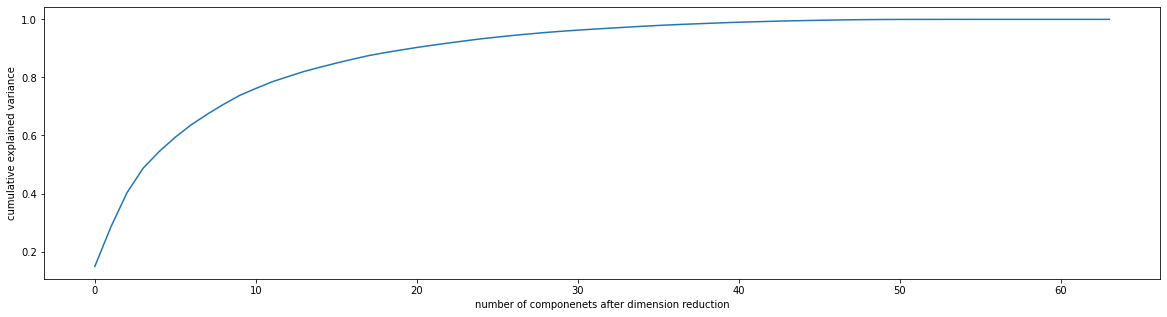

In [19]:
# 绘制方差累加曲线,选择特征保留数量

def plot_line(x):
    pca_line=PCA().fit(x)
    plt.figure(figsize=[20,5])
    plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
    plt.xlabel("number of componenets after dimension reduction")
    plt.ylabel("cumulative explained variance")
    plt.show()
    
plot_line(x)

d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

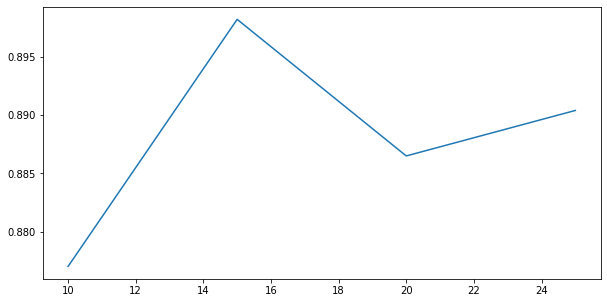

In [26]:
### 使用降维数据绘制随机森林学习曲线
def plot_learn(x,y):
    score=[]
    for i in range(10,30,5):
        x_dr=PCA(i).fit_transform(x)
        once=cross_val_score(RFC(n_estimators=10,random_state=0),x_dr,y,cv=5).mean()
        score.append(once)
    plt.figure(figsize=[10,5])
    plt.plot(range(10,30,5),score)
    plt.show()
    
plot_learn(x,y)  

In [50]:
%%time
x_dr=PCA(14).fit_transform(x)
cross_val_score(RFC(n_estimators=100,random_state=0),x_dr,y,cv=5).mean()

d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A co

Wall time: 1.33 s


0.9360213556174559

### 使用KNN进行跑分（使用降维后的数据进行跑分）

In [42]:
from sklearn.neighbors import KNeighborsClassifier as KNN

cross_val_score(KNN(),x_dr,y,cv=5).mean()

d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

0.9543918291550604

### 绘制KNN中k值的学习曲线

d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

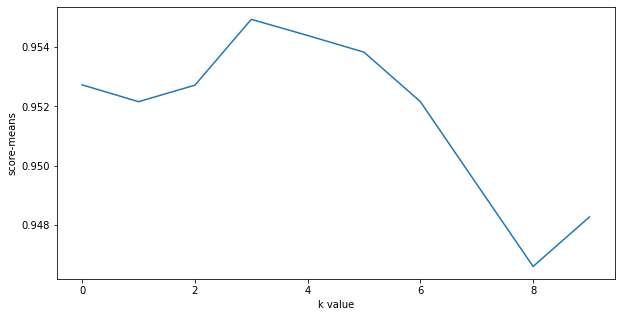

In [46]:
def plot_knn(x_dr,y):
    score=[]
    for i in range(10):
        once=cross_val_score(KNN(i+1),x_dr,y,cv=5).mean()
        score.append(once)
    plt.figure(figsize=[10,5])
    plt.plot(range(10),score)
    plt.xlabel('k value')
    plt.ylabel('score-means')
    plt.show()
    
plot_knn(x_dr,y)

In [49]:
%%time

cross_val_score(KNN(3),x_dr,y,cv=5).mean()

Wall time: 75 ms


d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
d:\miniconda3\envs\torch_qxy\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

0.9527143299288147